In [2]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
from dmba import plotDecisionTree, classificationSummary, regressionSummary
import pydotplus
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [33]:
#pd.set_option('display.max_rows', None)  # 전체 행 출력
pd.options.display.max_rows = 60

## 1. 전처리 및 train set, test set 생성

In [32]:
# train set으로 쓰일 시,도별 + 경기도 데이터 셋

sido = pd.read_csv("./final_dataset/지역명_사망자수(train).csv")
sido = sido.drop(columns=['Unnamed: 0'])
sido

,지역명,병원수,격리병상수,남은 격리병상수,총인구,요양기관수,60세 이상 - 계,60~64세,65~69세,70~74세,75~79세,80~84세,85세이상,확진자수,사망자수
0,강원도,18.0,539.0,75.0,1347375.0,34.0,369970,116558,81374,56864,53119,38211,23844,440985.0,746
1,경상남도,35.0,940.0,176.0,3295942.0,129.0,774696,253193,179622,128375,99667,70217,43622,1052389.0,1134
2,경상북도,29.0,1046.0,271.0,2583157.0,111.0,719154,213011,162533,119640,100383,75400,48187,731978.0,1203
3,광주광역시,19.0,240.0,55.0,1477573.0,60.0,290547,96662,65287,52134,38610,23826,14028,518968.0,520
4,대구광역시,18.0,876.0,249.0,2410700.0,75.0,559877,182705,133421,95965,73211,47435,27140,734292.0,1243
5,대전광역시,10.0,325.0,80.0,1488435.0,47.0,299964,102881,70114,50097,37683,24168,15021,496421.0,612
6,부산광역시,28.0,679.0,188.0,3212282.0,169.0,869020,278378,214341,157522,114719,68256,35804,1026370.0,2002
7,서울특별시,47.0,2150.0,361.0,9231569.0,125.0,2045748,654912,485063,369940,272798,163781,99254,3391551.0,4504
8,세종특별자치시,2.0,32.0,9.0,353933.0,5.0,48720,16969,11421,7769,5719,3938,2904,134571.0,34
9,울산광역시,7.0,229.0,49.0,1135423.0,40.0,218134,84906,55024,34583,22620,13350,7651,366309.0,322


In [24]:
sido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   loc         46 non-null     object 
 1   cnt_hos     46 non-null     float64
 2   bed         46 non-null     float64
 3   remain_bed  46 non-null     float64
 4   pop         46 non-null     float64
 5   nurse       46 non-null     float64
 6   total60     46 non-null     int64  
 7   60-64       46 non-null     int64  
 8   65-69       46 non-null     int64  
 9   70-74       46 non-null     int64  
 10  75-79       46 non-null     int64  
 11  80-84       46 non-null     int64  
 12  85-         46 non-null     int64  
 13  conf        46 non-null     float64
 14  death       46 non-null     int64  
dtypes: float64(6), int64(8), object(1)
memory usage: 5.5+ KB


In [38]:
# 칼럼명 변경

columns = ['loc','cnt_hos','bed','remain_bed','pop','nurse','total60','60-64','65-69','70-74','75-79','80-84','85-','conf','death']
var_name = pd.DataFrame(sido.columns, columns, columns=['meaning'])
var_name

,meaning
loc,지역명
cnt_hos,병원수
bed,격리병상수
remain_bed,남은 격리병상수
pop,총인구
nurse,요양기관수
total60,60세 이상 - 계
60-64,60~64세
65-69,65~69세
70-74,70~74세


In [39]:
sido.columns = columns
sido.head()

,loc,cnt_hos,bed,remain_bed,pop,nurse,total60,60-64,65-69,70-74,75-79,80-84,85-,conf,death
0,강원도,18.0,539.0,75.0,1347375.0,34.0,369970,116558,81374,56864,53119,38211,23844,440985.0,746
1,경상남도,35.0,940.0,176.0,3295942.0,129.0,774696,253193,179622,128375,99667,70217,43622,1052389.0,1134
2,경상북도,29.0,1046.0,271.0,2583157.0,111.0,719154,213011,162533,119640,100383,75400,48187,731978.0,1203
3,광주광역시,19.0,240.0,55.0,1477573.0,60.0,290547,96662,65287,52134,38610,23826,14028,518968.0,520
4,대구광역시,18.0,876.0,249.0,2410700.0,75.0,559877,182705,133421,95965,73211,47435,27140,734292.0,1243


### outlier 찾기 ~ boxplot

/var/folders/z6/j3q11gsn0ls8wtjzqj36nssm0000gp/T/ipykernel_5670/1354456652.py:5: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


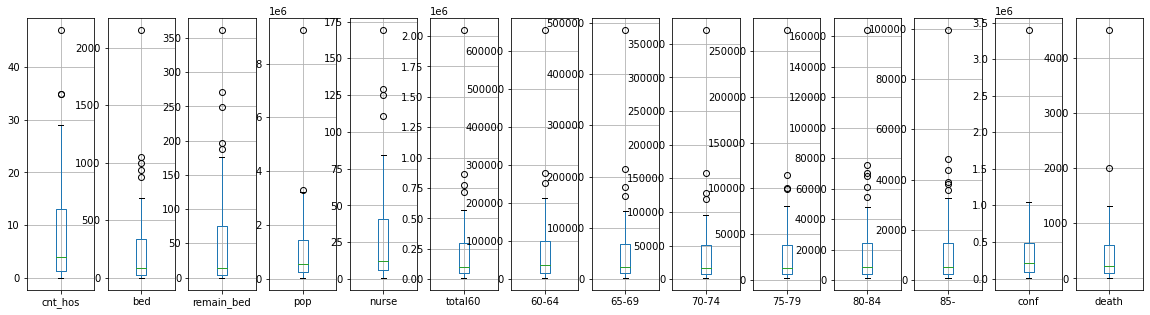

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=14)
for (i,j) in zip(sido.drop(columns=['loc']).columns, range(0,14)):
    sido.boxplot(column=i, ax = axes[j])

plt.tight_layout()
fig.set_size_inches(20, 5)
plt.show()

## ⭐️⭐️⭐️
## 근데 이 데이터셋이 원래부터 시,도별 데이터랑 경기도 시군구 데이터가 섞인거라... 둘이 규모가 아예 다른데 
## 이 outlier를 신뢰할 수 있는건가 싶어서 각 열별로 가장 이상치가 심한 데이터 행들만 삭제하기로 하고, 이상치에 강한 robust scaler를 사용하기로 했습니다.
## 이 부분이 헷갈려서 틀린 부분이 있으면 알려주시면 감사하겠습니다. 
## 그리고 이렇게 규모가 다른 데이터가 섞여있을때도 상관없이 이상치를 싸그리 다 제거해도 되는건지 궁금합니다!!

In [43]:
# 행별로 이상치 가장 심한 데이터 제거
sido.max(axis=0)

loc                충청북도
cnt_hos            47.0
bed              2150.0
remain_bed        361.0
pop           9231569.0
nurse             169.0
total60         2045748
60-64            654912
65-69            485063
70-74            369940
75-79            272798
80-84            163781
85-               99254
conf          3391551.0
death              4504
dtype: object

In [44]:
## nurse 빼고 모든 행별 최대값이 서울특별시의 데이터라는 것을 알 수 있으므로, 서울특별시 행을 삭제합니다. 
sido[sido['loc']=='서울특별시']

,loc,cnt_hos,bed,remain_bed,pop,nurse,total60,60-64,65-69,70-74,75-79,80-84,85-,conf,death
7,서울특별시,47.0,2150.0,361.0,9231569.0,125.0,2045748,654912,485063,369940,272798,163781,99254,3391551.0,4504


In [48]:
## nurse 중에서 최대값을 가지는 부산광역시의 행을 삭제합니다.
sido[sido['nurse'] == max(sido['nurse'])]

,loc,cnt_hos,bed,remain_bed,pop,nurse,total60,60-64,65-69,70-74,75-79,80-84,85-,conf,death
6,부산광역시,28.0,679.0,188.0,3212282.0,169.0,869020,278378,214341,157522,114719,68256,35804,1026370.0,2002


In [76]:
sido2 = sido.drop(index=[7,6]) # 제거
sido2 = sido2.reset_index(drop=True)
sido2.head()

,loc,cnt_hos,bed,remain_bed,pop,nurse,total60,60-64,65-69,70-74,75-79,80-84,85-,conf,death
0,강원도,18.0,539.0,75.0,1347375.0,34.0,369970,116558,81374,56864,53119,38211,23844,440985.0,746
1,경상남도,35.0,940.0,176.0,3295942.0,129.0,774696,253193,179622,128375,99667,70217,43622,1052389.0,1134
2,경상북도,29.0,1046.0,271.0,2583157.0,111.0,719154,213011,162533,119640,100383,75400,48187,731978.0,1203
3,광주광역시,19.0,240.0,55.0,1477573.0,60.0,290547,96662,65287,52134,38610,23826,14028,518968.0,520
4,대구광역시,18.0,876.0,249.0,2410700.0,75.0,559877,182705,133421,95965,73211,47435,27140,734292.0,1243


### 변수 간 상관관계 시각화

<AxesSubplot:>

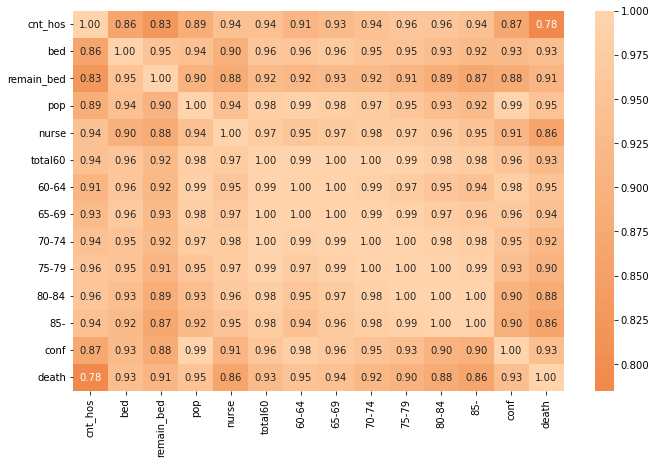

In [68]:
import seaborn as sns
corr = sido2.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,7)
sns.heatmap(corr, annot=True, fmt=".2f",center=0, ax=ax)

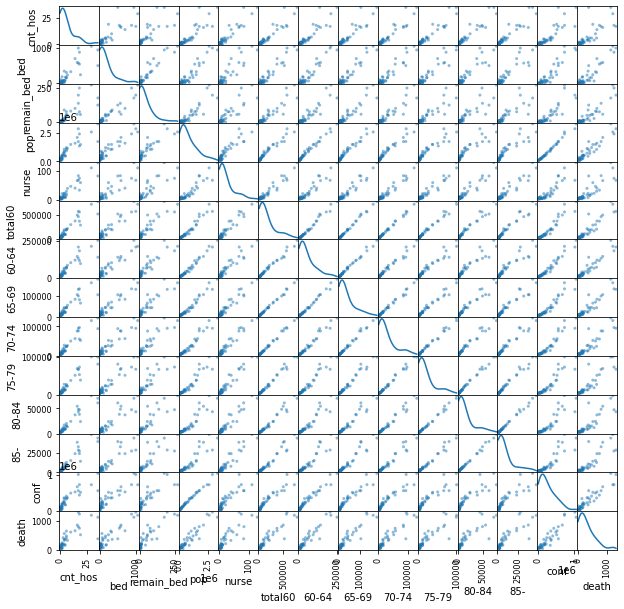

In [70]:
from pandas.plotting import scatter_matrix, parallel_coordinates
axes = scatter_matrix(sido2, alpha = 0.5, figsize = (10,10), diagonal='kde')

### 데이터셋 분리

In [77]:
x = sido2.drop(columns=['loc','death'])
y = sido2['death']
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=1) # test
train_x, valid_x, train_y, valid_y = train_test_split(train_x, train_y, test_size=0.3, random_state=1) # train, valid

### 스케일링 - 로버스트 스케일러 사용

In [74]:
from sklearn.preprocessing import RobustScaler
#print(robustScaler.fit(train_data))
#train_data_robustScaled = robustScaler.transform(train_data)

In [78]:
columns_ = ['cnt_hos','bed','remain_bed','pop','nurse','total60','60-64','65-69','70-74','75-79','80-84','85-','conf']
scaler = RobustScaler()
sc_train_x = pd.DataFrame(scaler.fit_transform(train_x), columns = columns_)
sc_train_x.head()

,cnt_hos,bed,remain_bed,pop,nurse,total60,60-64,65-69,70-74,75-79,80-84,85-,conf
0,3.0,1.638989,1.173077,0.940452,0.857143,1.568962,1.215307,1.338709,1.483220,1.889101,1.878692,1.899857,0.910169
1,0.6,0.787004,1.192308,0.608430,0.714286,0.631430,0.580277,0.488776,0.580032,0.680444,0.719073,0.745406,0.620092
2,3.0,2.855596,4.519231,2.109955,2.321429,2.659228,2.156981,2.493256,2.909535,2.825311,2.460868,2.236321,1.963968
3,-0.6,-0.306859,-0.269231,-0.365235,-0.214286,-0.362014,-0.261901,-0.291327,-0.406143,-0.415172,-0.378566,-0.354839,-0.446379
4,0.4,0.306859,0.538462,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.034524,0.149245,-0.050465


## 2. 모델 fit, 성능 확인 

#### 모델 적용

In [79]:
rf = RandomForestRegressor(n_estimators=500, random_state=1) # n_estimators=500
rf.fit(sc_train_x, train_y)

RandomForestRegressor(n_estimators=500, random_state=1)

#### 변수 중요도 확인 

In [80]:
# variable (feature) importance plot

importances = rf.feature_importances_
# rf.estimators_ : random forest로 구한 나무 모델 500개. 
df = pd.DataFrame({'Feature':train_x.columns, 'importance':importances})
df = df.sort_values('importance')
print(df)

       Feature  importance
0      cnt_hos    0.040015
7        65-69    0.040648
4        nurse    0.041707
5      total60    0.053966
3          pop    0.054055
12        conf    0.059138
6        60-64    0.065543
8        70-74    0.076145
10       80-84    0.105769
1          bed    0.106924
2   remain_bed    0.111962
11         85-    0.118941
9        75-79    0.125187


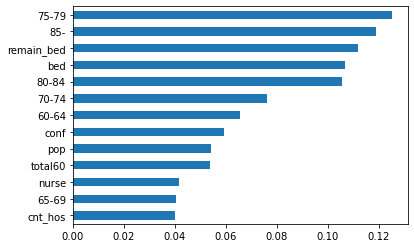

In [81]:
ax = df.plot(kind='barh',x='Feature',y='importance', legend=False)
# barh : 가로막대플롯
ax.set_ylabel('')
plt.show()

### 성능 확인

In [82]:
# train set
regressionSummary(train_y, rf.predict(sc_train_x))


Regression statistics

                      Mean Error (ME) : 3.6795
       Root Mean Squared Error (RMSE) : 42.1927
            Mean Absolute Error (MAE) : 30.9026
          Mean Percentage Error (MPE) : -11.4008
Mean Absolute Percentage Error (MAPE) : 19.2554


In [83]:
# valid set
sc_valid_x = scaler.transform(valid_x)
regressionSummary(valid_y, rf.predict(sc_valid_x))


Regression statistics

                      Mean Error (ME) : -68.1009
       Root Mean Squared Error (RMSE) : 186.7913
            Mean Absolute Error (MAE) : 101.7644
          Mean Percentage Error (MPE) : -12.3952
Mean Absolute Percentage Error (MAPE) : 26.3506


In [84]:
# test set
sc_test_x = scaler.transform(test_x)
regressionSummary(test_y, rf.predict(sc_test_x))


Regression statistics

                      Mean Error (ME) : 12.5974
       Root Mean Squared Error (RMSE) : 99.4374
            Mean Absolute Error (MAE) : 74.7597
          Mean Percentage Error (MPE) : -2.5513
Mean Absolute Percentage Error (MAPE) : 36.5914


### 예측 오차 시각화

In [95]:
# boxplot
pred_error_train = pd.DataFrame({ 'residual' : train_y - rf.predict(sc_train_x),
                                  'data set' : 'training'})
pred_error_valid = pd.DataFrame({ 'residual' : valid_y - rf.predict(sc_valid_x),
                                  'data set' : 'validation'})
pred_error_test = pd.DataFrame({ 'residual' : test_y - rf.predict(sc_test_x),
                                  'data set' : 'test'})
boxdata_df = pred_error_train.append(pred_error_valid, ignore_index = True)
boxdata_df = boxdata_df.append(pred_error_test, ignore_index = True)
boxdata_df.tail()

,residual,data set
39,-19.838,test
40,-102.078,test
41,-6.834,test
42,224.304,test
43,-28.522,test


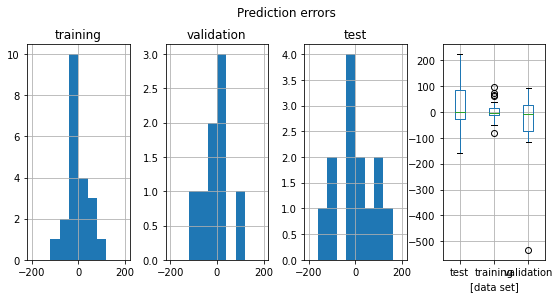

In [96]:
fig, axes = plt.subplots(nrows=1, ncols=4)
fig.set_size_inches(9,4)
common = {'bins':10, 'range':[-200, 200]} #
pred_error_train.hist(ax=axes[0], **common)
pred_error_valid.hist(ax=axes[1], **common)
pred_error_test.hist(ax=axes[2], **common)
boxdata_df.boxplot(ax=axes[3], by='data set')

axes[0].set_title('training')
axes[1].set_title('validation')
axes[2].set_title('test')
axes[3].set_title('')

plt.suptitle('Prediction errors')
plt.subplots_adjust(bottom=0.1, top=0.85, wspace=0.35)
plt.show()

## 검증데이터로 했을때 이상치는 없고 [-100,100]사이의 오차를 가짐. 특히 [-50,50]사이의 오차가 가장 많다.

### 파라미터 조정

In [ ]:
# 가장 중요한 max_features, n_estimators만 조정했습니다.

Storng law of large numbers를 만족 시키기 위해 2000개 이상의 tree 필요  
노드 분할 시 무작위로 선택되는 변수의 수 > Regression = 변수의 수 / 3  
참고 https://youtu.be/lIT5-piVtRw   

In [98]:
# < grid search >
param_grid = {
    'n_estimators' : [1300, 1500, 1700, 2000],
    'max_features' : [2,3,4,5,6,7,8,9,10]
}
gridSearch = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(sc_train_x, train_y)
print('Improved parameters : ', gridSearch.best_params_)

regTree = gridSearch.best_estimator_
regressionSummary(train_y, regTree.predict(sc_train_x))
regressionSummary(valid_y, regTree.predict(sc_valid_x))

Improved parameters :  {'max_features': 8, 'n_estimators': 1300}

Regression statistics

                      Mean Error (ME) : 4.1668
       Root Mean Squared Error (RMSE) : 41.8314
            Mean Absolute Error (MAE) : 31.4995
          Mean Percentage Error (MPE) : -11.6855
Mean Absolute Percentage Error (MAPE) : 19.7974

Regression statistics

                      Mean Error (ME) : -67.5128
       Root Mean Squared Error (RMSE) : 184.9843
            Mean Absolute Error (MAE) : 101.1176
          Mean Percentage Error (MPE) : -11.9737
Mean Absolute Percentage Error (MAPE) : 26.2210


       Feature  importance
0      cnt_hos    0.048705
12        conf    0.054448
4        nurse    0.055675
5      total60    0.060125
3          pop    0.064951
7        65-69    0.065640
8        70-74    0.070067
6        60-64    0.092897
11         85-    0.093221
10       80-84    0.093887
9        75-79    0.096571
2   remain_bed    0.099147
1          bed    0.104665


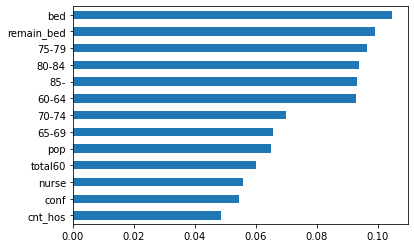

In [101]:
importances = regTree.feature_importances_
df = pd.DataFrame({'Feature':train_x.columns, 'importance':importances})
df = df.sort_values('importance')
print(df)
ax = df.plot(kind='barh',x='Feature',y='importance', legend=False)
# barh : 가로막대플롯
ax.set_ylabel('')
plt.show()

In [99]:
# 위에서 n_estimators가 가장 작은 1300으로 선택되어서 n_estimators를 작게 조정하여 다시 grid search를 시행
# < grid search >
param_grid = {
    'n_estimators' : [500, 700, 1000,1300],
    'max_features' : [2,3,4,5,6,7,8,9,10]
}
gridSearch = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(sc_train_x, train_y)
print('Improved parameters : ', gridSearch.best_params_)
regTree_grid = gridSearch.best_estimator_
regressionSummary(train_y, regTree_grid.predict(sc_train_x))
regressionSummary(valid_y, regTree_grid.predict(sc_valid_x))

Improved parameters :  {'max_features': 2, 'n_estimators': 500}

Regression statistics

                      Mean Error (ME) : 3.0713
       Root Mean Squared Error (RMSE) : 39.7616
            Mean Absolute Error (MAE) : 30.0104
          Mean Percentage Error (MPE) : -12.2810
Mean Absolute Percentage Error (MAPE) : 19.8425

Regression statistics

                      Mean Error (ME) : -67.5396
       Root Mean Squared Error (RMSE) : 186.6007
            Mean Absolute Error (MAE) : 102.1791
          Mean Percentage Error (MPE) : -11.5798
Mean Absolute Percentage Error (MAPE) : 27.1457


In [ ]:
# 미세한 차이지만 'max_features': 8, 'n_estimators': 1300 모델이 가장 좋아서 이를 채택함 (regTree)

### test 세트에 대한 최종 예측 성능

In [102]:
regressionSummary(test_y, regTree.predict(sc_test_x))


Regression statistics

                      Mean Error (ME) : 13.6660
       Root Mean Squared Error (RMSE) : 99.1300
            Mean Absolute Error (MAE) : 75.2386
          Mean Percentage Error (MPE) : -4.7323
Mean Absolute Percentage Error (MAPE) : 39.2035


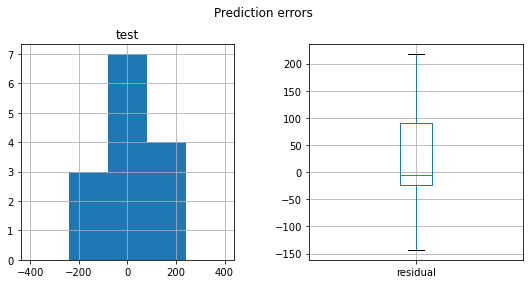

In [107]:
pred_error_test = pd.DataFrame({ 'residual' : test_y - regTree.predict(sc_test_x),
                                  'data set' : 'test'})

fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(9,4)
common = {'bins':5, 'range':[-400, 400]} #
pred_error_test.hist(ax=axes[0], **common)
pred_error_test.boxplot(ax=axes[1])

axes[0].set_title('test')
axes[1].set_title('')

plt.suptitle('Prediction errors')
plt.subplots_adjust(bottom=0.1, top=0.85, wspace=0.35)
plt.show()

## 검증데이터로 했을때 이상치는 없고 [-100,100]사이의 오차를 가짐. 특히 [-50,50]사이의 오차가 가장 많다.

## 실제 데이터에 predict

In [108]:
pred_sido = pd.read_csv("./final_dataset/시도명_시군구명(predict).csv").drop(columns=['Unnamed: 0'])
pred_sido.head()

,시도명,시군구명,병원수,격리병상수,남은 격리병상수,총인구,요양기관수,60세 이상 - 계,60~64세,65~69세,70~74세,75~79세,80~84세,85세이상,확진자수
0,강원도,강릉시,3.0,79.0,24.0,216542.0,3.0,61339,18656,13586,9988,8900,6185,4024,65832.0
1,강원도,동해시,2.0,66.0,1.0,87801.0,3.0,24762,7662,5655,4087,3680,2278,1400,28349.0
2,강원도,삼척시,1.0,51.0,8.0,65939.0,1.0,21481,6050,4525,3591,3311,2377,1627,17543.0
3,강원도,속초시,2.0,119.0,5.0,80054.0,2.0,22194,7239,4986,3556,3055,2062,1296,27323.0
4,강원도,영월군,1.0,27.0,1.0,36282.0,1.0,14753,4248,3297,2309,2283,1671,945,9242.0


In [109]:
columns = ['loc_sido','loc_gun','cnt_hos','bed','remain_bed','pop','nurse','total60','60-64','65-69','70-74','75-79','80-84','85-','conf']
pred_sido.columns = columns
pred_sido.head()

,loc_sido,loc_gun,cnt_hos,bed,remain_bed,pop,nurse,total60,60-64,65-69,70-74,75-79,80-84,85-,conf
0,강원도,강릉시,3.0,79.0,24.0,216542.0,3.0,61339,18656,13586,9988,8900,6185,4024,65832.0
1,강원도,동해시,2.0,66.0,1.0,87801.0,3.0,24762,7662,5655,4087,3680,2278,1400,28349.0
2,강원도,삼척시,1.0,51.0,8.0,65939.0,1.0,21481,6050,4525,3591,3311,2377,1627,17543.0
3,강원도,속초시,2.0,119.0,5.0,80054.0,2.0,22194,7239,4986,3556,3055,2062,1296,27323.0
4,강원도,영월군,1.0,27.0,1.0,36282.0,1.0,14753,4248,3297,2309,2283,1671,945,9242.0


In [110]:
predictors = pred_sido.drop(columns=['loc_sido','loc_gun'])
predictors.head()

,cnt_hos,bed,remain_bed,pop,nurse,total60,60-64,65-69,70-74,75-79,80-84,85-,conf
0,3.0,79.0,24.0,216542.0,3.0,61339,18656,13586,9988,8900,6185,4024,65832.0
1,2.0,66.0,1.0,87801.0,3.0,24762,7662,5655,4087,3680,2278,1400,28349.0
2,1.0,51.0,8.0,65939.0,1.0,21481,6050,4525,3591,3311,2377,1627,17543.0
3,2.0,119.0,5.0,80054.0,2.0,22194,7239,4986,3556,3055,2062,1296,27323.0
4,1.0,27.0,1.0,36282.0,1.0,14753,4248,3297,2309,2283,1671,945,9242.0


In [111]:
pred_death=[]
for i in range(0,206):
    pred_death.append(regTree.predict(predictors.loc[[i]]))

In [112]:
pred_sido_death = pred_sido
pred_sido_death['pred_death'] = pd.DataFrame(pred_death)
pred_sido_death

,loc_sido,loc_gun,cnt_hos,bed,remain_bed,pop,nurse,total60,60-64,65-69,70-74,75-79,80-84,85-,conf,pred_death
0,강원도,강릉시,3.0,79.0,24.0,216542.0,3.0,61339,18656,13586,9988,8900,6185,4024,65832.0,1205.486
1,강원도,동해시,2.0,66.0,1.0,87801.0,3.0,24762,7662,5655,4087,3680,2278,1400,28349.0,1158.494
2,강원도,삼척시,1.0,51.0,8.0,65939.0,1.0,21481,6050,4525,3591,3311,2377,1627,17543.0,1137.546
3,강원도,속초시,2.0,119.0,5.0,80054.0,2.0,22194,7239,4986,3556,3055,2062,1296,27323.0,1190.314
4,강원도,영월군,1.0,27.0,1.0,36282.0,1.0,14753,4248,3297,2309,2283,1671,945,9242.0,1098.264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,충청북도,제천시,2.0,32.0,3.0,134768.0,6.0,39959,12590,9246,6191,5764,3910,2258,42422.0,1199.836
202,충청북도,증평군,0.0,0.0,0.0,37183.0,1.0,8734,2788,1954,1337,1225,887,543,15155.0,887.800
203,충청북도,진천군,1.0,67.0,17.0,89514.0,1.0,18410,5699,4030,2787,2445,2112,1337,34557.0,1137.546
204,충청북도,청주시,7.0,445.0,73.0,855326.0,14.0,162294,56336,37220,25076,20488,14104,9070,297157.0,1205.486


In [114]:
pred_sido_death.to_csv("./final_dataset/랜덤포레스트_예측결과.csv")